# Skillbox — Мастер-класс. Разведочный анализ данных + Подготовка отчётов — Kiva.org
***

# Домашнее задание
***

Это домашнее задание призвано укрепить ваши знания EDA. Давайте вернёмся к примеру с компанией Kiva.

Для начала вспомним, чем занимается компания.

#  1. Kiva и её деятельность
***
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Kiva.org_logo_2016.svg/640px-Kiva.org_logo_2016.svg.png" width="500" height="200" />

Kiva — это некоммерческая организация, которая позволяет нуждающимся более чем в 80 странах мира получать финансирование под различного рода проекты и нужды.

Девиз Kiva — **Make a loan, change a life**.

В основном деятельность Kiva связана с поддержкой населения, развитием малого бизнеса, а также финансированием социальных проектов.

Список заявок, назначений и стран, нуждающихся в финансировании, можно посмотреть на сайте [kiva.org](https://www.kiva.org).
Это темы, так или иначе связанные с сельским хозяйством, питанием, здоровьем и гигиеной, розничной торговлей и поддержкой малого бизнеса.


## 1.1. Kiva в цифрах
***

**На сегодняшний день Kiva выделила более одного миллиарда долларов двум миллионам заемщиков и считается одним из главных участников борьбы с бедностью, особенно во многих африканских странах.**

* За время существования Кива помогла 2,7 млн нуждающимся
* 1,7 млн небезразличных участников, желающих помочь
* 83 страны
* Сумма средств, выделенных через Kiva, составляет $1,11 млрд
* 97,0% — доля возврата средств инвесторам (очень высокий показатель)
* 81% заемщиков Kiva — женщины
* Кредит Kiva финансируется каждые две минуты

## 1.2. Как работает Kiva
***

<img src="https://miro.medium.com/max/1400/1*I-5sWkHtvaSSkYfCs-PptA.png" width="1024" height="737" />

## 1.3. Набор данных от Kiva
***

**kiva_loans** — это набор данных, который содержит большую часть информации о займах:
- id — уникальный идентификатор для кредита;
- funded_amount — сумма, выплаченная Kiva агенту на местах (USD);
- loan_amount — сумма, выплаченная полевым агентом заёмщику (USD);
- sector — сектор использования займа;
- activity — более гранулированная категория;
- use — назначение использования суммы кредита;
- country_code — ISO-код страны страны, в которой был выдан заём;
- country — полное название страны, в которой был выдан кредит;
- posted_time — время, в которое заявка была опубликована на Kiva;
- disbursed_time — время, когда кредитный агент выдал заёмщику сумму;
- funded_time — время, когда заявка полностью финансируется кредиторами;
- term_in_months — срок, на который был выдан кредит, в месяцах;
- lender_count — общее количество кредиторов, которые внесли свой вклад в этот кредит;
- loaner_genders — разделённые запятыми буквы M и F, где каждый экземпляр представляет одного мужчину / одну женщину в группе.

**kiva_mpi_region_locations** — набор данных, содержащий данные о регионах и показатели MPI. Global Multidimensional Poverty Index — глобальный индекс бедности ряда регионов (субнациональных) в мире. Чем больше это значение, тем выше бедность в соответствующем регионе:
- country — страна;
- region — регион в стране;
- world_region — часть света;
- MPI — многомерный индекс бедности;
- geo — координаты (широта, долгота).




# 2. Разведочный анализ данных
***

Для выполнения работы сохраните копию на свой диск, нажав на кнопку «Файл» в верхней панели и выбрав «Сохранить копию на диск».

## Импорт библиотек

In [ ]:
import missingno as msno

In [18]:
import numpy as np
import pandas as pd
import math

from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-v0_8')
palette = plt.get_cmap('Set2')

import os

## Загрузка данных

Для удобства можно загрузить данные в колаб, предварительно их заархивировав, а затем использовать команду `!unzip kiva_loans.csv.zip`.





In [19]:
df_kiva_loans = pd.read_csv("kiva_loans.csv")
df_mpi = pd.read_csv("kiva_mpi_region_locations.csv")

_________

### Задание 1. Проверьте, что данные загрузились корректно, выведя на экран первые три строчки каждого датасета.

In [20]:
df_kiva_loans.head(3)


,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01


In [21]:
df_mpi.head(3)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754


Отлично! Данные загружены верно. Теперь давайте посмотрим, присутствуют ли в них пропуски.
### Задание 2. Сделайте визуализацию для проверки наличия пропусков в двух наборах данных

Используйте метод, показанный в лонгриде:

```
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis');
```



In [9]:
#эту библиатеку нет возможности импортировать
msno.bar(df_kiva_loans)

NameError: name 'msno' is not defined

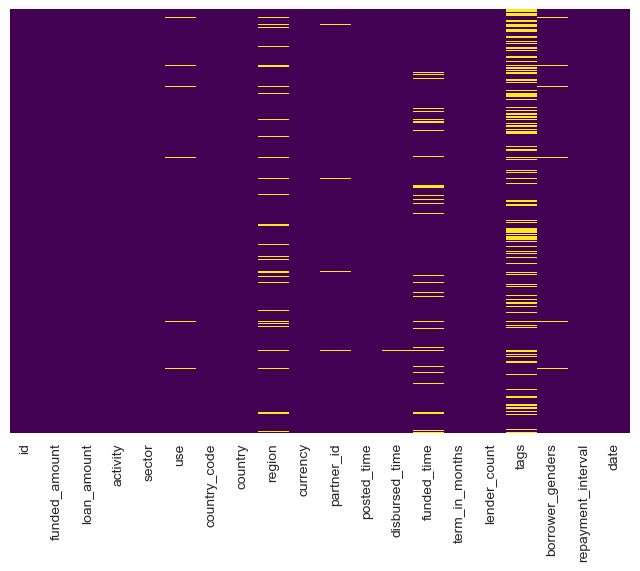

In [25]:
sns.heatmap(df_kiva_loans.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.show()

In [26]:
#получаем пропущенные данные
print(df_kiva_loans['region'].isna().sum())
print(df_kiva_loans['tags'].isna().sum())
print(df_kiva_loans['funded_time'].isna().sum())
print("Есть ли пропуски в данных?", df_kiva_loans.isnull().any().any())

56800
171416
48331
Есть ли пропуски в данных? True


In [ ]:
msno.matrix(df_mpi)

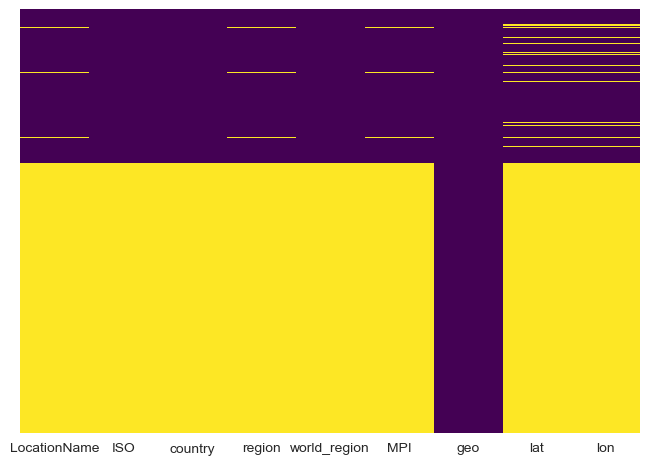

In [27]:
sns.heatmap(df_mpi.isnull(), cbar=False, yticklabels=False, cmap = 'viridis')
plt.show()

In [12]:
#проверяем второй датасет на пропуски
print(df_mpi['LocationName'].isna().sum())
print(df_mpi['ISO'].isna().sum())
print(df_mpi['country'].isna().sum())
print(df_mpi['world_region'].isna().sum())
print(df_mpi['MPI'].isna().sum())
print(df_mpi['geo'].isna().sum())
print(df_mpi['lat'].isna().sum())
print(df_mpi['lon'].isna().sum())

1788
1764
1764
1764
1788
0
1880
1880


**Что мы видим?**

В некоторых колонках присутствуют пропуски.

Помимо визуализаций, наличие пропусков можно отследить с помощью метода ```info()```.

### Задание 3. Попробуйте применить данный метод к нашим таблицам и сравните число ненулевых значений каждого признака с количеством строк датасетов



In [14]:
df_kiva_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [13]:
df_mpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LocationName  984 non-null    object 
 1   ISO           1008 non-null   object 
 2   country       1008 non-null   object 
 3   region        984 non-null    object 
 4   world_region  1008 non-null   object 
 5   MPI           984 non-null    float64
 6   geo           2772 non-null   object 
 7   lat           892 non-null    float64
 8   lon           892 non-null    float64
dtypes: float64(3), object(6)
memory usage: 195.0+ KB


Помимо числа ненулевых значений каждого столбца, мы сразу можем отследить, к какому типу данных относятся признаки.

Так как пропусков в данных немного, давайте выбросим строки, содержащие NaN.
### Задание 4. С помощью метода ```dropna``` удалите строки с пропусками из датасетов

*Подсказка: чтобы не перезаписывать данные ```(data=data.dropna())```, используйте параметр ```inplace = True```*.

In [28]:
df_kiva_loans.dropna(inplace = True)

Посчитайте количество записей в таблицах после удаления строк, содержащих NaN.

In [30]:
print("Пропущенных ячеек с данными", df_kiva_loans.isnull().sum().sum())

Пропущенных ячеек с данными 0


In [31]:
df_mpi.dropna(inplace = True)

In [32]:
print("Пропущенных ячеек с данными", df_mpi.isnull().sum().sum())

Пропущенных ячеек с данными 0


_____________

## Пользователи Kiva

Теперь, когда мы знаем, какие типы признаков присутствуют в данных, когда все пропуски обработаны, настало время перейти к постановке гипотез и их проверке.


### Задание 1. Используя таблицу ```df_kiva_loans```, попробуйте найти связь между сроком кредита (**term_in_months**), количеством кредиторов, которые внесли свой вклад в этот кредит, (**lender_count**) и суммой займа (**loan_amount**). Какие выводы можно сделать из этих данных?

**Для этого**:

1. Выделите три указанных столбца в отдельную таблицу `df_temp`.
2. Найдите корреляцию между признаками с помощью команды `df_temp.corr()`, сохраните полученные значения в переменную `df_corr`.
3. Используя метод `heatmap` библиотеки `seaborn`, визуализируйте полученный результат, для наглядности задайте параметры `cmap='BrBG', annot=True`.




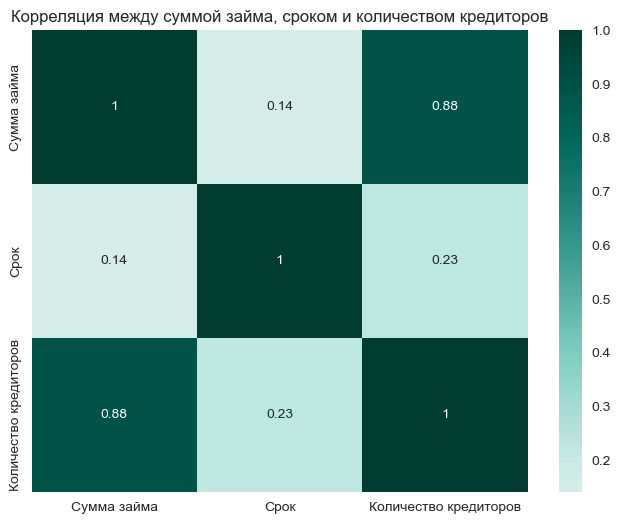

In [40]:
#выбираем нужные столбцы
df_temp = df_temp = df_kiva_loans[['loan_amount', 'term_in_months', 'lender_count']]
#считаем корреляцию
df_corr = df_temp.corr()
#задаем русские подписи для осей
russian_labels = ['Сумма займа', 'Срок', 'Количество кредиторов']

#строим тепловую карту
plt.figure(figsize=(8, 6))

sns.heatmap(df_corr, cmap='BrBG', annot=True, center=0, xticklabels=russian_labels, yticklabels=russian_labels)
plt.title('Корреляция между суммой займа, сроком и количеством кредиторов')


plt.show()

### Задание 2. Проанализируйте разброс показателя **funded_amount** путём построения визуализации

Иcпользуйте метод `histplot` библиотеки `seaborn`.

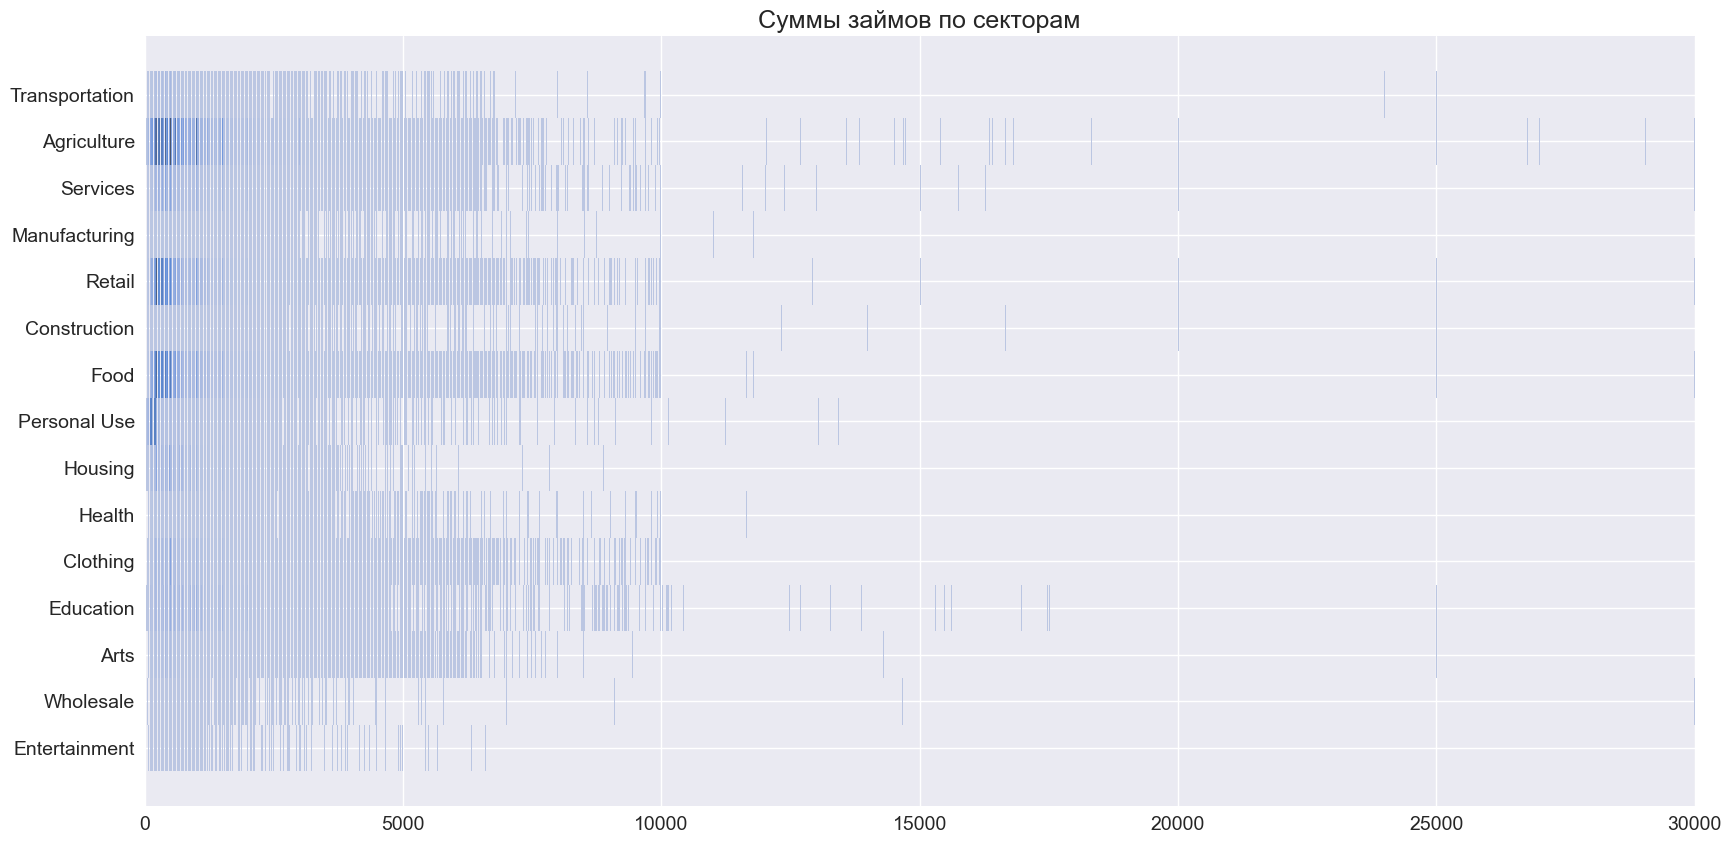

In [56]:
#с помощью histplot выводим суммы займов по секторам
plt.figure(figsize=(20,10))
plt.title("Суммы займов по секторам", fontsize=18)

plt.tick_params(labelsize=14)

ax = sns.histplot(data = df_kiva_loans, x='funded_amount', y='sector').set(ylabel=None, xlabel=None)
#устанавливаем пределы осей X 
plt.xlim(0, 30000)
plt.show()

### Задание 3. Изучите несколько займов с большими суммами (> 20 000). Что можно сказать о назначении этих заявок? В каких странах они оформлены?

Подсказка: для того чтобы выделить объекты с большими суммами, можно воспользоваться командой `df_kiva_loans[df_kiva_loans.loan_amount > 20000]`.

In [67]:
#Изучаем несколько займов с большими суммами > 20000
max_baks = df_kiva_loans[df_kiva_loans['funded_amount'] >= 20000] 
max_baks

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
34196,687045,50000.0,50000.0,Renewable Energy Products,Retail,to buy and sell Barefoot Power's Solar Lightin...,PE,Peru,Arequipa,USD,212.0,2014-03-21 05:25:02+00:00,2014-05-21 07:00:00+00:00,2014-04-18 06:32:55+00:00,14.0,1446,"user_favorite, user_favorite, #Eco-friendly, #...",male,irregular,2014-03-21
38725,691328,25000.0,25000.0,Construction Supplies,Construction,To supply construction materials for a vocatio...,RW,Rwanda,Kigali,USD,319.0,2014-03-31 09:43:06+00:00,2014-03-26 07:00:00+00:00,2014-04-16 22:14:29+00:00,7.0,821,"user_favorite, #Repeat Borrower, #Unique, #Job...",male,irregular,2014-03-31
43182,695450,50000.0,50000.0,Renewable Energy Products,Retail,To buy and sell Barefoot Power's solar lightin...,KE,Kenya,Nairobi,USD,212.0,2014-04-09 08:25:02+00:00,2014-06-09 07:00:00+00:00,2014-04-19 19:27:30+00:00,16.0,1491,"user_favorite, user_favorite, user_favorite, u...",male,bullet,2014-04-09
53634,706146,50000.0,50000.0,Renewable Energy Products,Retail,To buy and sell Barefoot Power solar lighting.,UG,Uganda,Kampala,USD,212.0,2014-05-06 09:25:03+00:00,2014-07-06 07:00:00+00:00,2014-05-18 15:31:08+00:00,14.0,1581,"#Eco-friendly, #Biz Durable Asset, #Post-disbu...",female,bullet,2014-05-06
70499,722883,100000.0,100000.0,Agriculture,Agriculture,create more than 300 jobs for women and farmer...,HT,Haiti,Les Cayes,USD,315.0,2014-06-10 19:25:02+00:00,2014-09-08 07:00:00+00:00,2014-06-19 20:21:04+00:00,75.0,2986,"user_favorite, user_favorite, user_favorite, u...",female,irregular,2014-06-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636486,1298882,36000.0,36000.0,Manufacturing,Manufacturing,to provide more jobs and training to unskilled...,KE,Kenya,Kiambu,USD,529.0,2017-05-15 22:12:57+00:00,2017-06-30 07:00:00+00:00,2017-06-01 16:27:12+00:00,20.0,1180,"user_favorite, user_favorite, user_favorite, u...",male,irregular,2017-05-15
636999,1299524,30000.0,30000.0,Renewable Energy Products,Retail,to purchase solar lanterns and solar home syst...,SL,Sierra Leone,Freetown,USD,531.0,2017-05-16 18:33:34+00:00,2017-06-30 07:00:00+00:00,2017-05-22 16:01:34+00:00,14.0,588,"#Eco-friendly, #Technology, user_favorite, use...",male,irregular,2017-05-16
637572,1300389,30000.0,30000.0,Agriculture,Agriculture,increase smallholder farmers’ incomes by buyin...,UG,Uganda,Kampala,USD,530.0,2017-05-17 20:00:42+00:00,2017-06-30 07:00:00+00:00,2017-05-22 09:30:49+00:00,20.0,970,"user_favorite, user_favorite, user_favorite, u...",male,irregular,2017-05-17
660211,1322535,25000.0,25000.0,Food,Food,to increase the company's production capacity ...,GH,Ghana,Accra,USD,535.0,2017-06-19 07:44:23+00:00,2017-08-31 07:00:00+00:00,2017-06-22 04:10:44+00:00,14.0,785,"user_favorite, user_favorite, user_favorite, #...",female,irregular,2017-06-19


In [59]:
#Оставляем только те страны, которые составляют не менее 0,5% сообщества Kiva.
countries = df_kiva_loans['country'].value_counts()[df_kiva_loans['country'].value_counts(normalize=True)> 0.005]
list_countries = list(countries.index)

In [63]:
#выделяем третью группу гендеров
df_kiva_loans['borrower_genders'] = [elem if elem in ['female','male'] else 'group' for elem in df_kiva_loans['borrower_genders'] ]


In [70]:
#фильтруем и группируем датасет
max_baks_gender = \
    max_baks[max_baks['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['female','male'])[-20:]

max_baks_gender = max_baks_gender[['female', 'male', 'group']]



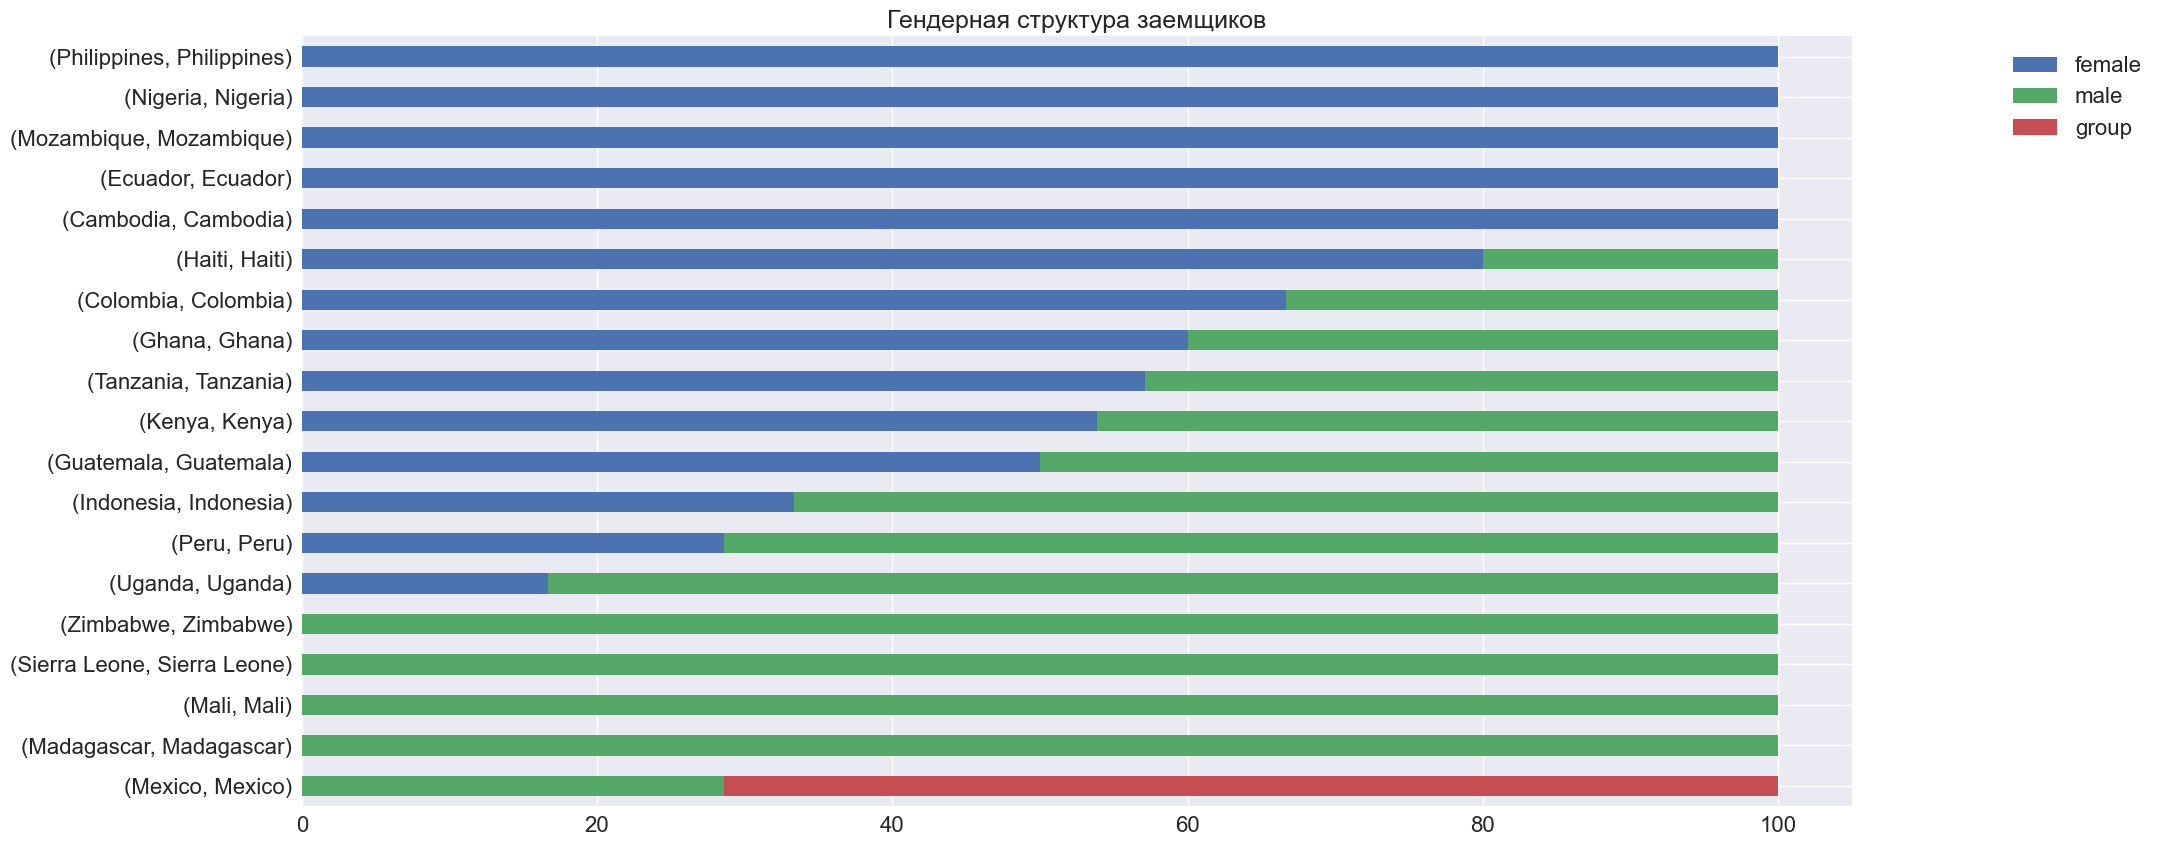

In [71]:
#сосздаем сет с распеределением по гендерам заемщиков более 20000
plot = max_baks_gender.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

____________

## Многомерный уровень бедности

### Задание 1. Найдите топ-5 регионов по среднему уровню бедности. Для этого сгруппируйте данные таблицы ```df_mpi``` по параметру **region** и найдите среднее значение **MPI** по группам

*Подсказка: для сортировки данных типа ```Series`` от большего значения к меньшему` , используйте метод ```sort_values``` с параметром `ascending = False`*.

In [74]:
#делаем merge двух датасетов по "Стране"
df_mpi_grouped = df_mpi\
    .groupby(['ISO', 'country', 'world_region'])['MPI']\
    .mean()\
    .fillna(0)\
    .reset_index()
df_kiva_loans = df_kiva_loans.merge(df_mpi_grouped, how='left', on='country')

In [78]:
#проверяем NULL
print(df_kiva_loans['world_region'].isna().sum())
print(df_kiva_loans['MPI'].isna().sum())
print(df_kiva_loans['ISO'].isna().sum())


81314
81314
81314


In [79]:
#очищаем NULL
df_kiva_loans_clean = df_kiva_loans.dropna(subset=['world_region', 'MPI'])
print(df_kiva_loans_clean['ISO'].isna().sum())

0


In [80]:
# Наблюдаемое отклонение от среднего
dev = (df_kiva_loans_clean['loan_amount']-df_kiva_loans_clean['loan_amount'].mean()).abs()
# Стандартное отклонение
std = df_kiva_loans_clean['loan_amount'].std()
# Фильтруем исходный набор данных
df_kiva_loans_trimmed = df_kiva_loans_clean[~(dev>3*std)]
df_kiva_loans_trimmed

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,ISO,world_region,MPI
2,653078,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,Ellahabad,PKR,...,2014-01-10 18:18:44+00:00,14.0,8,"#Elderly, #Woman Owned Biz",female,monthly,2014-01-01,PAK,South Asia,0.233167
3,653082,475.0,475.0,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",PK,Pakistan,Lahore,PKR,...,2014-01-01 18:47:21+00:00,14.0,19,user_favorite,female,monthly,2014-01-01,PAK,South Asia,0.233167
4,653089,400.0,400.0,General Store,Retail,"to buy stock of rice, sugar and flour .",PK,Pakistan,Faisalabad,PKR,...,2014-01-08 00:35:14+00:00,14.0,16,"#Repeat Borrower, #Woman Owned Biz",female,monthly,2014-01-01,PAK,South Asia,0.233167
6,653091,400.0,400.0,General Store,Retail,"to buy packs of salts, biscuits and beverages.",PK,Pakistan,Faisalabad,PKR,...,2014-01-14 15:57:05+00:00,14.0,11,"#Woman Owned Biz, #Parent",female,monthly,2014-01-01,PAK,South Asia,0.233167
8,653080,475.0,475.0,Beauty Salon,Services,to buy more cosmetics products for her beauty ...,PK,Pakistan,Lahore,PKR,...,2014-01-10 03:22:29+00:00,14.0,18,#Woman Owned Biz,female,monthly,2014-01-01,PAK,South Asia,0.233167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423073,1338648,1300.0,1300.0,Retail,Retail,"to buy perfumes, creams, lotions, etc.",EC,Ecuador,Portoviejo,USD,...,2017-07-15 15:50:13+00:00,7.0,4,"#Parent, #Woman Owned Biz, #Repeat Borrower",female,monthly,2017-07-12,ECU,Latin America and Caribbean,0.018250
423074,1338653,500.0,500.0,Crafts,Arts,to buy thread to make hammocks.,SV,El Salvador,Gotera,USD,...,2017-07-15 23:29:36+00:00,12.0,9,"#Fabrics, user_favorite, user_favorite",female,bullet,2017-07-12,SLV,Latin America and Caribbean,0.031500
423076,1338832,350.0,350.0,Personal Medical Expenses,Health,to pay for her husband's operation and hospita...,TJ,Tajikistan,Isfara,TJS,...,2017-07-14 16:36:03+00:00,14.0,9,"volunteer_like, #Health and Sanitation",female,monthly,2017-07-13,TJK,Europe and Central Asia,0.046600
423078,1338878,475.0,475.0,Higher education costs,Education,to pay her son's tuition.,TJ,Tajikistan,Dushanbe,TJS,...,2017-07-16 04:29:11+00:00,14.0,12,"#Schooling, #Parent",female,monthly,2017-07-13,TJK,Europe and Central Asia,0.046600


In [81]:
#находим среднее значение MPI по группам
MPI_mean_median = df_kiva_loans_clean\
    .groupby(['world_region'])['MPI']\
    .agg(median='median', mean='mean')\
    .sort_values(by='median', ascending=False)

sort_order = MPI_mean_median.index.to_list()

MPI_mean_median

,median,mean
world_region,,
South Asia,0.233167,0.231517
Sub-Saharan Africa,0.209375,0.275296
East Asia and the Pacific,0.061824,0.088744
Europe and Central Asia,0.046600,0.046600
Latin America and Caribbean,0.031500,0.059690
Arab States,0.006333,0.061931


### Задание 2. Постройте диаграму показателя **MPI** (многомерный индекс бедности) в разных странах

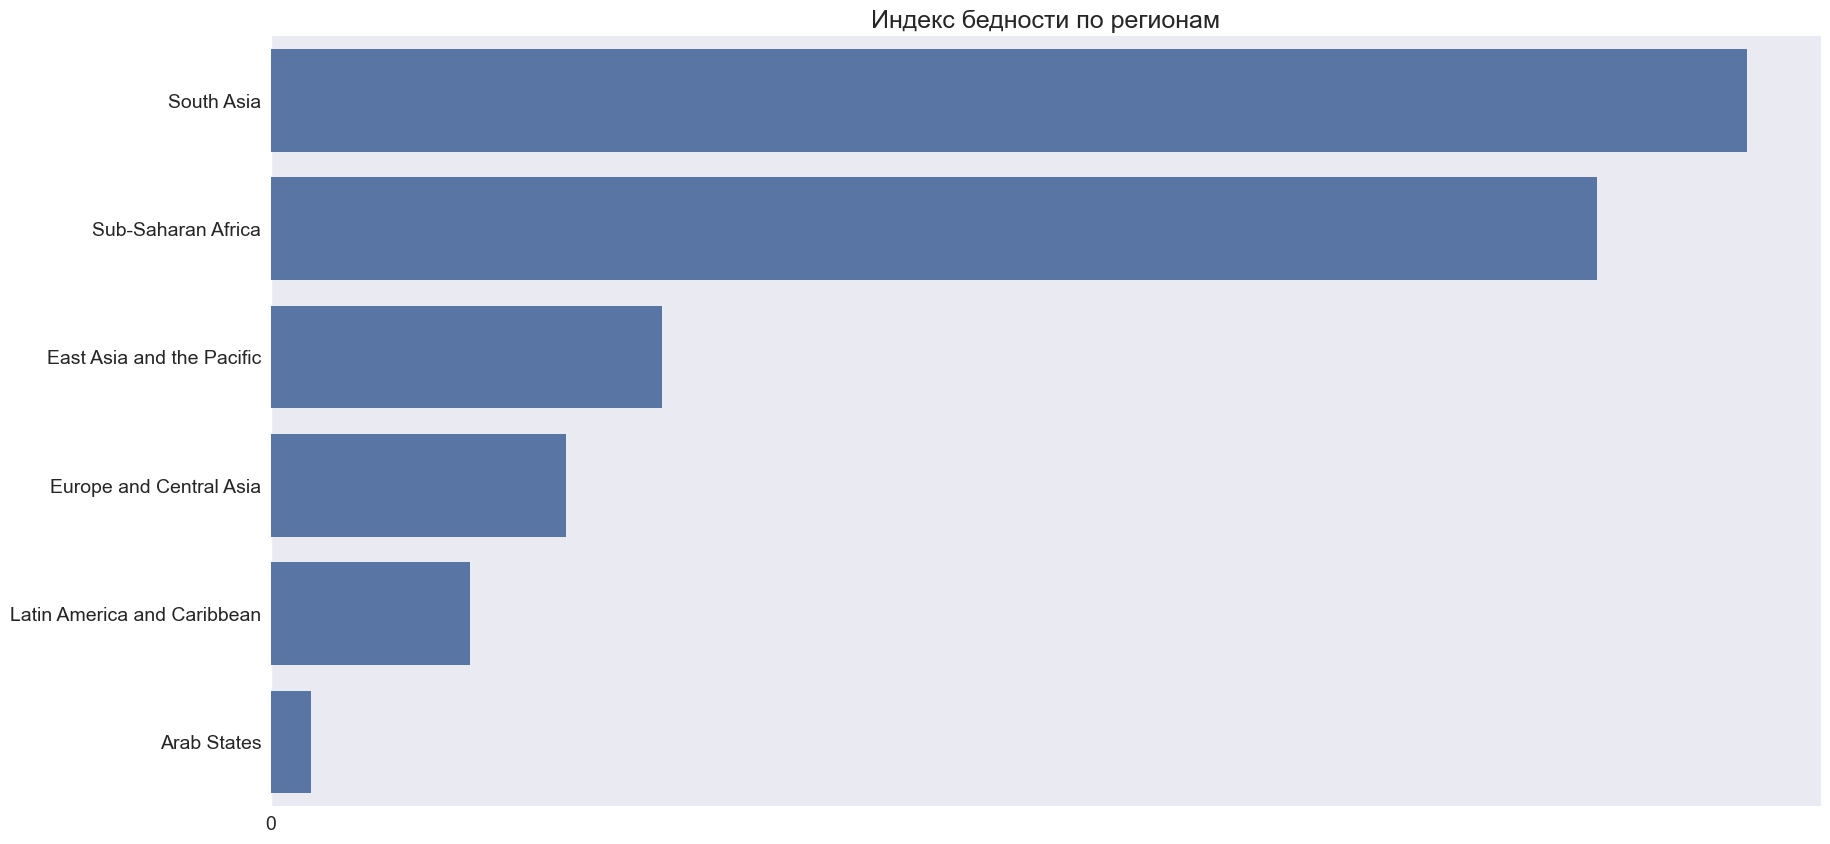

In [86]:
#стоим диаграмму показателя MPI в разных регионах
plt.figure(figsize=(20,10))
plt.title("Индекс бедности по регионам", fontsize=18)
plt.xticks(np.arange(0, max(MPI_mean_median['median']+1), 10))
plt.tick_params(labelsize=14)

sns.barplot(x='median', y="world_region", order=sort_order, data=MPI_mean_median).set(ylabel=None, xlabel=None)
plt.show()

In [87]:
#находим среднее значение MPI по странам
MPI_mean_median_country = df_kiva_loans_clean\
    .groupby(['country'])['MPI']\
    .agg(median='median', mean='mean')\
    .sort_values(by='median', ascending=False)

sort_order = MPI_mean_median_country.index.to_list()

MPI_mean_median_country

,median,mean
country,,
Burkina Faso,0.544917,0.544917
South Sudan,0.540000,0.540000
Sierra Leone,0.481071,0.481071
Mali,0.434200,0.434200
Liberia,0.432214,0.432214
Burundi,0.411800,0.411800
Madagascar,0.389286,0.389286
Timor-Leste,0.379250,0.379250
Uganda,0.375300,0.375300


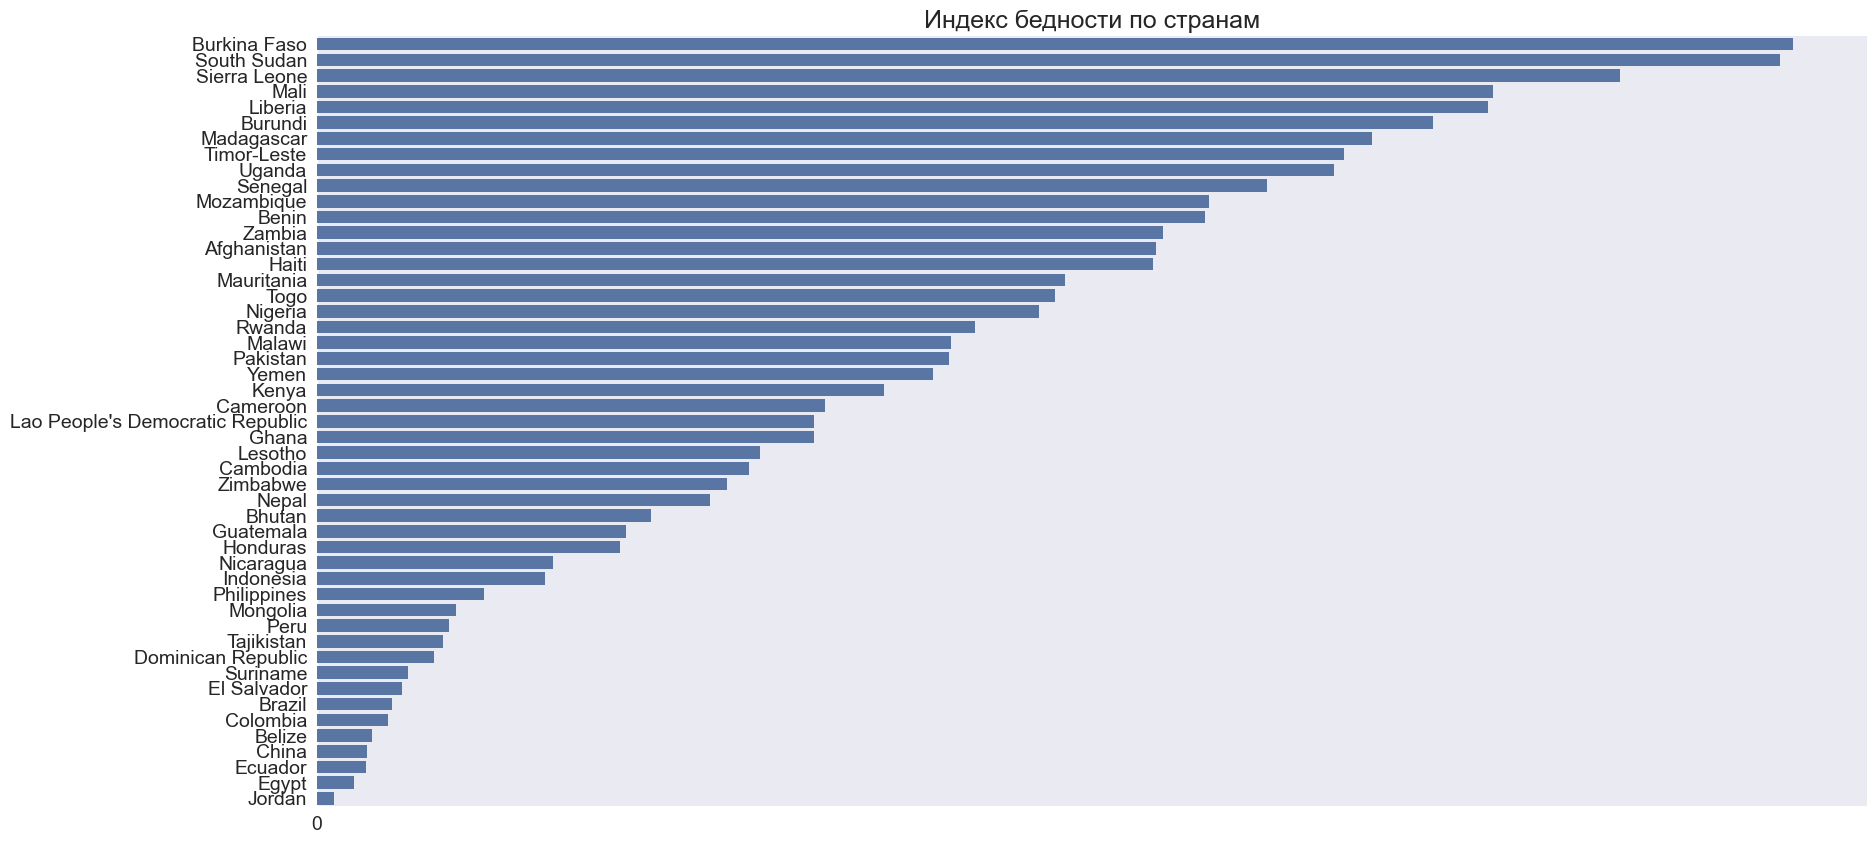

In [90]:
#стоим диаграмму показателя MPI в разных странах
plt.figure(figsize=(20,10))
plt.title("Индекс бедности по странам", fontsize=18)
plt.xticks(np.arange(0, max(MPI_mean_median_country['median']+1), 10))
plt.tick_params(labelsize=14)

sns.barplot(x='median', y="country", order=sort_order, data=MPI_mean_median_country).set(ylabel=None, xlabel=None)
plt.show()

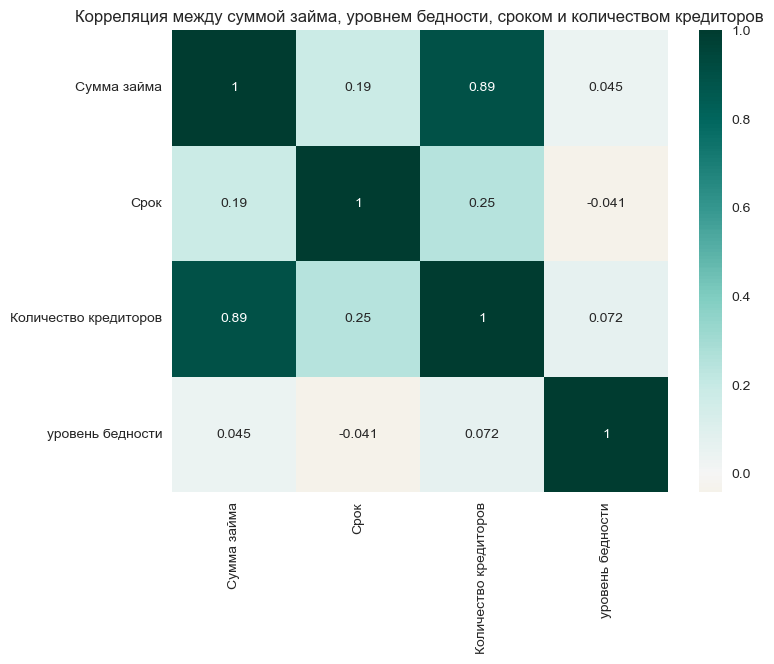

In [98]:
#проверяем кореляцию многомерного индекса бедности с суммами займов и сроками их погашения
df_temp_MPI = df_kiva_loans_trimmed[['loan_amount', 'term_in_months', 'lender_count', 'MPI']]
#считаем корреляцию
df_corr = df_temp_MPI.corr()
#задаем русские подписи для осей
russian_labels = ['Сумма займа', 'Срок', 'Количество кредиторов', 'уровень бедности']

#строим тепловую карту
plt.figure(figsize=(8, 6))

sns.heatmap(df_corr, cmap='BrBG', annot=True, center=0, xticklabels=russian_labels, yticklabels=russian_labels)
plt.title('Корреляция между суммой займа, уровнем бедности, сроком и количеством кредиторов')


plt.show()

In [96]:
#делаем датасет распределения гендеров для самых бедных регионов с показателем MPI > 0.15
median_MPI = df_kiva_loans_trimmed[(df_kiva_loans_trimmed['MPI'] <= 0.25) & (df_kiva_loans_trimmed['MPI'] >= 0.15)] 
median_MPI_clean = median_MPI.dropna(subset=['world_region'])
#группировка данных по регионам и полу
gender_by_region = (median_MPI_clean.groupby(['world_region', 'borrower_genders'])
                   .size()
                   .unstack(fill_value=0))

#вычисление процентного соотношения
gender_percentage = gender_by_region.div(gender_by_region.sum(axis=1), axis=0) * 100

#выбор топ-20 регионов (по общему количеству заемщиков)
top_regions = gender_by_region.sum(axis=1).nlargest(20).index
gender_top = gender_percentage.loc[top_regions]

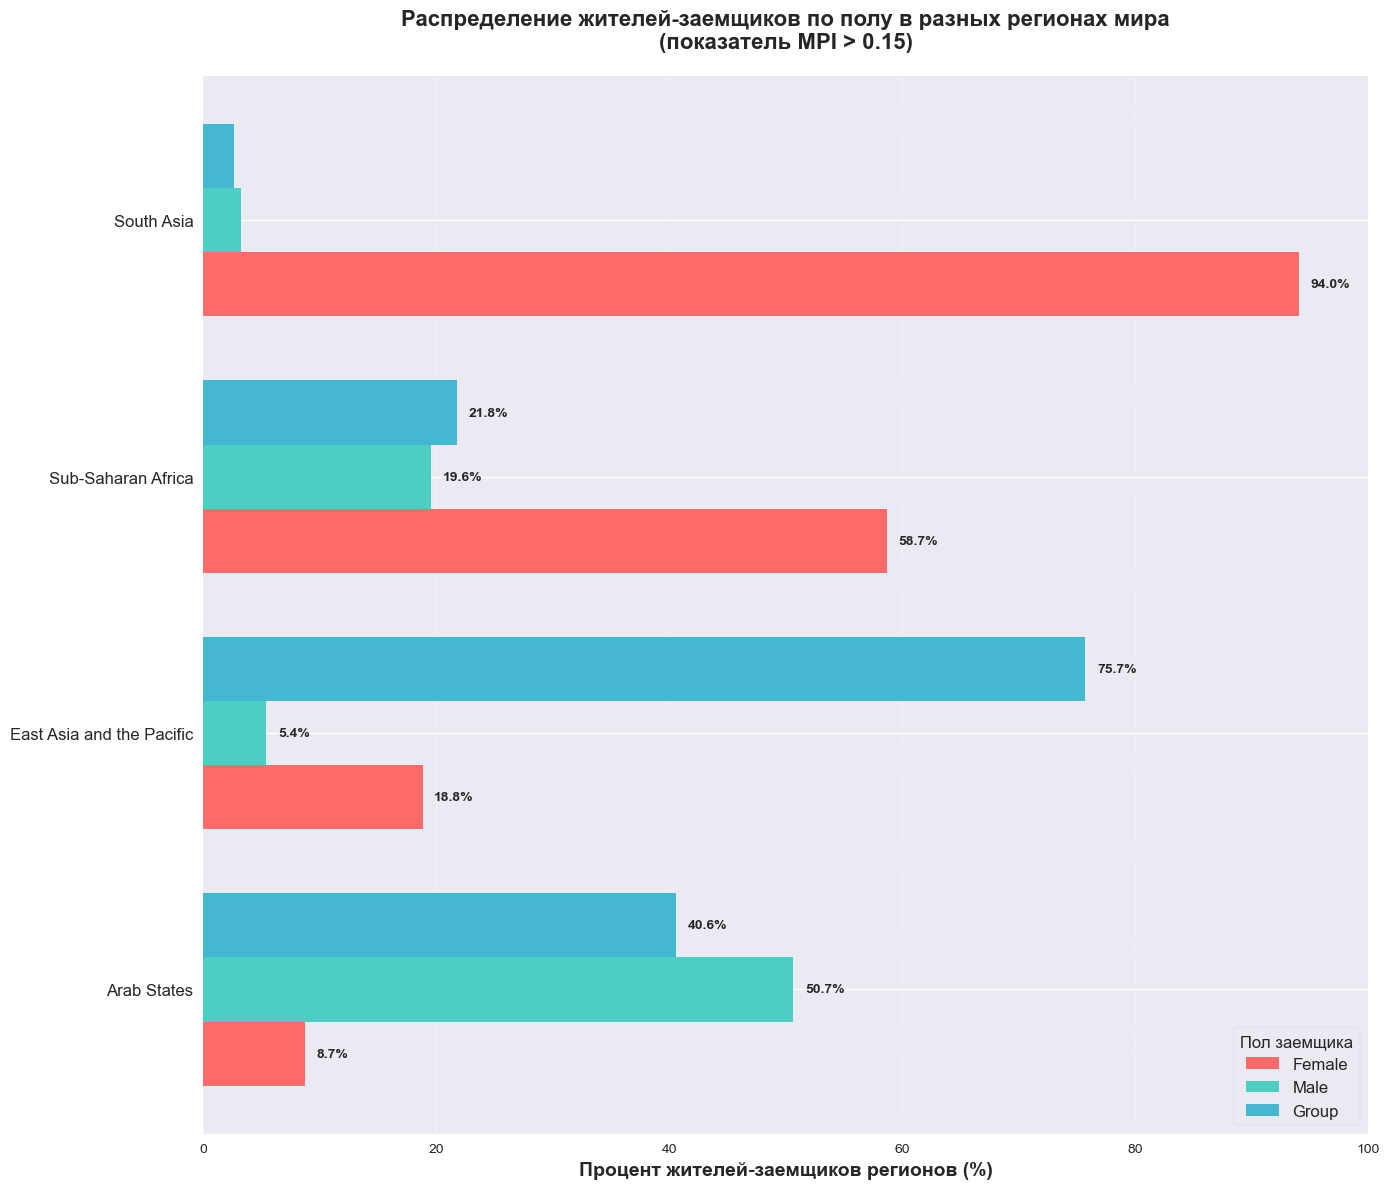

In [97]:
#cортировка данных для визуализации
gender_sorted = gender_top.sort_values(by=gender_top.columns.tolist())

#cоздание горизонтального bar chart
fig, ax = plt.subplots(figsize=(14, 12))

#цвета для разных гендеров
colors = {'female': '#FF6B6B', 'male': '#4ECDC4', 'group': '#45B7D1'}

#позиции для bars
y_pos = np.arange(len(gender_sorted))
bar_height = 0.25

#построение bars для каждого гендера
for i, gender in enumerate(['female', 'male', 'group']):
    if gender in gender_sorted.columns:
        values = gender_sorted[gender].values
        ax.barh(y_pos + i * bar_height, values, bar_height, 
                label=gender.capitalize(), color=colors[gender])
        
        #добавление подписей значений
        for j, value in enumerate(values):
            if value > 5:  #подписываем только значимые значения
                ax.text(value + 1, y_pos[j] + i * bar_height, f'{value:.1f}%', 
                       va='center', fontsize=10, fontweight='bold')

#настройка внешнего вида
ax.set_yticks(y_pos + bar_height)
ax.set_yticklabels(gender_sorted.index, fontsize=12)
ax.set_xlabel('Процент жителей-заемщиков регионов (%)', fontsize=14, fontweight='bold')
ax.set_title('Распределение жителей-заемщиков по полу в разных регионах мира\n(показатель MPI > 0.15)', 
             fontsize=16, fontweight='bold', pad=20)

#легенда
ax.legend(loc='lower right', fontsize=12, title='Пол заемщика', 
          title_fontsize=12, frameon=True, fancybox=True)

#сетка
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

#ограничение по оси X
ax.set_xlim(0, 100)

#улучшение layout
plt.tight_layout()
plt.show()

In [ ]:
В ходе выполненного анализа можно сделать выводы:
1. Наличие взаимосвязи между суммой займа и количеством кредитов во всех странах
2. Присутствие аномалий в данных по займам, есть крупные займы, более 20000$
3. Зависимость уровня бедности от региона проживания пользователей. Выявлено 2 самых бедных региона в Южной Индии и к Югу от Сахары в Африке. В обоих регионах среди заемщиков преобладают женщины.
4 .Влияние многомерного индекса бедности в разных странах на суммы займов и сроки погашения наблюдается в беднейших странах в большом количестве кредитов, чуть менее бедность корелирует с суммами кредита и не корелирует со сроками